In [1]:
import numpy as np
import pandas as pd
import seaborn
seaborn.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:

data = pd.read_csv("../Stock Price Prediction/^GSPC.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

         Date   Open   High    Low  Close  Adj Close   Volume
0  1950-01-03  16.66  16.66  16.66  16.66      16.66  1260000
1  1950-01-04  16.85  16.85  16.85  16.85      16.85  1890000
2  1950-01-05  16.93  16.93  16.93  16.93      16.93  2550000
3  1950-01-06  16.98  16.98  16.98  16.98      16.98  2010000
4  1950-01-09  17.08  17.08  17.08  17.08      17.08  2520000
             Date         Open         High          Low        Close  \
17452  2019-05-14  2820.120117  2852.540039  2820.120117  2834.409912   
17453  2019-05-15  2820.379883  2858.679932  2815.080078  2850.959961   
17454  2019-05-16  2855.800049  2892.149902  2855.800049  2876.320068   
17455  2019-05-17  2858.600098  2885.479980  2854.229980  2859.530029   
17456  2019-05-20  2841.939941  2853.860107  2831.290039  2840.229980   

         Adj Close      Volume  
17452  2834.409912  3322720000  
17453  2850.959961  3125950000  
17454  2876.320068  3338060000  
17455  2859.530029  3257950000  
17456  2840.229980  3288

,Open,High,Low,Close,Adj Close,Volume
count,17457.000000,17457.000000,17457.000000,17457.000000,17457.000000,1.745700e+04
mean,580.827018,584.246745,577.210190,580.958759,580.958759,9.356382e+08
std,694.077232,697.597727,690.263892,694.192632,694.192632,1.556770e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,86.059998,86.779999,85.349998,86.070000,86.070000,9.000000e+06
50%,167.229996,168.070007,166.639999,167.360001,167.360001,9.555000e+07
75%,1100.800049,1107.770020,1093.969971,1101.199951,1101.199951,1.231300e+09
max,2952.330078,2954.129883,2939.350098,2945.830078,2945.830078,1.145623e+10


In [3]:

data = pd.read_csv("../Stock Price Prediction/^GSPC.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
1950-01-03  16.66  16.66  16.66  16.66      16.66  1260000
1950-01-04  16.85  16.85  16.85  16.85      16.85  1890000
1950-01-05  16.93  16.93  16.93  16.93      16.93  2550000
1950-01-06  16.98  16.98  16.98  16.98      16.98  2010000
1950-01-09  17.08  17.08  17.08  17.08      17.08  2520000
<class 'pandas.core.frame.DataFrame'>
Index: 17457 entries, 1950-01-03 to 2019-05-20
Data columns (total 6 columns):
Open         17457 non-null float64
High         17457 non-null float64
Low          17457 non-null float64
Close        17457 non-null float64
Adj Close    17457 non-null float64
Volume       17457 non-null int64
dtypes: float64(5), int64(1)
memory usage: 954.7+ KB
DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [4]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


Text(0, 0.5, 'Daily price')

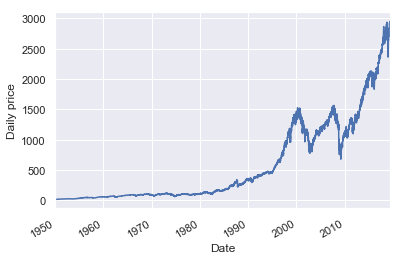

In [10]:
data['Open'].plot()
prices = data['Open'].tolist()
data.index.strftime("%Y-%m-%d")
dates = data.index.tolist()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
plt.ylabel("Daily price")

In [20]:
t= pd.to_datetime(str(dates)) 
timestring = t.strftime('%Y-%m-%d')

ValueError: ('Unknown string format:', "[[Timestamp('1950-01-03 00:00:00')]\n [Timestamp('1950-01-04 00:00:00')]\n [Timestamp('1950-01-05 00:00:00')]\n ...\n [Timestamp('2019-05-16 00:00:00')]\n [Timestamp('2019-05-17 00:00:00')]\n [Timestamp('2019-05-20 00:00:00')]]")

In [9]:

regressor = LinearRegression()
regressor.fit(dates, prices)
 
#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
 
#Predict Price on Given Date
date = [[10]]
predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [7]:
data = data['Open']

KeyError: 'Open'

# Time Series Indexing

In [9]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly price')

prices = data['Open'].tolist()
dates = data.index.tolist()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

regressor = LinearRegression()
regressor.fit(dates, prices)
 
#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
 
#Predict Price on Given Date
date = [[10]]
predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

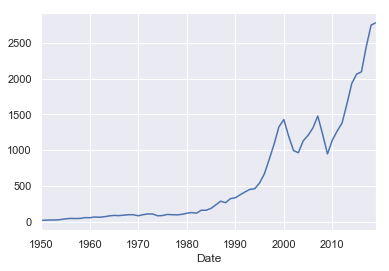

In [9]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

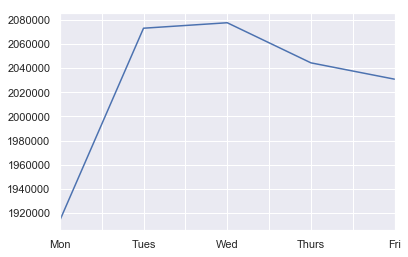

In [10]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
by_weekday.plot()

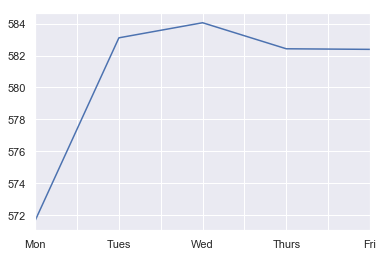

In [11]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
by_weekday.plot()

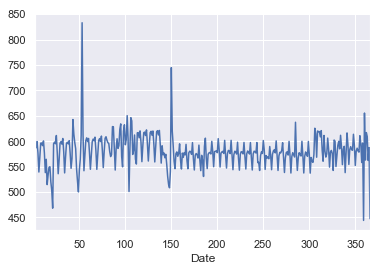

In [12]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

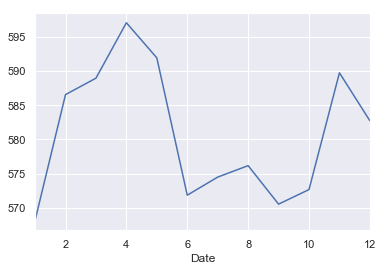

In [13]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

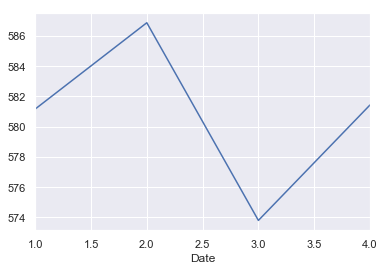

In [14]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

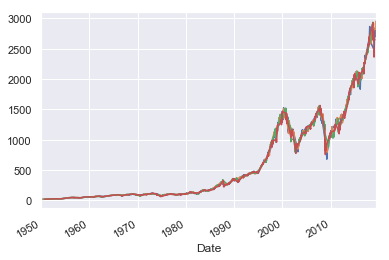

In [15]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

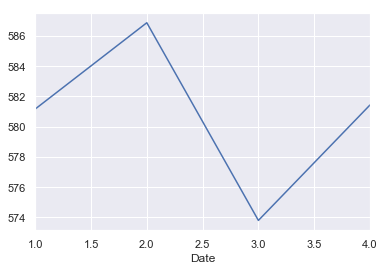

In [16]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

# Log Transformation

In [17]:
ts = data

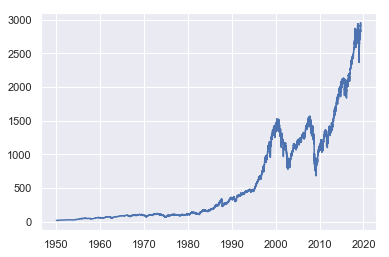

In [18]:
plt.plot(ts)

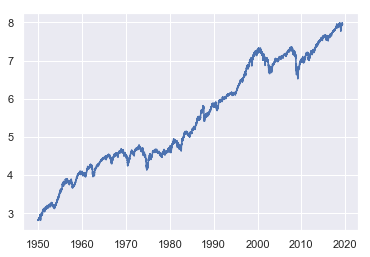

In [19]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [20]:
ts_logtransformed.head(10)

Date
1950-01-03    2.813011
1950-01-04    2.824351
1950-01-05    2.829087
1950-01-06    2.832036
1950-01-09    2.837908
1950-01-10    2.834977
1950-01-11    2.838493
1950-01-12    2.818995
1950-01-13    2.813611
1950-01-16    2.816606
Name: Open, dtype: float64

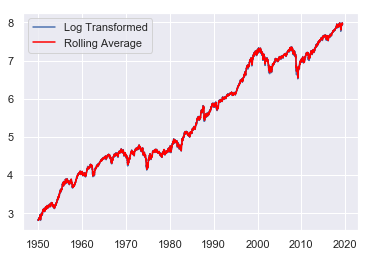

In [21]:
# Rolling Average vs Log Transform
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [22]:
Rolling_average.head(10)

Date
1950-01-03         NaN
1950-01-04         NaN
1950-01-05         NaN
1950-01-06         NaN
1950-01-09         NaN
1950-01-10         NaN
1950-01-11    2.829980
1950-01-12    2.830835
1950-01-13    2.829301
1950-01-16    2.827518
Name: Open, dtype: float64

In [23]:
# Difference between Rolling Average and Log Transform
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2019-05-07   -0.005472
2019-05-08   -0.014018
2019-05-09   -0.017097
2019-05-10   -0.011573
2019-05-13   -0.015543
2019-05-14   -0.017212
2019-05-15   -0.012706
2019-05-16    0.002609
2019-05-17    0.004635
2019-05-20   -0.000313
Name: Open, dtype: float64

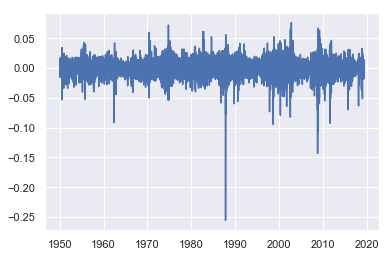

In [24]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

In [25]:
test_for_stationary(log_Rolling_difference)

NameError: name 'test_for_stationary' is not defined

Date
1950-01-03         NaN
1950-01-04         NaN
1950-01-05         NaN
1950-01-06         NaN
1950-01-09         NaN
1950-01-10         NaN
1950-01-11         NaN
1950-01-12    0.005984
1950-01-13   -0.010740
1950-01-16   -0.012482
Name: Open, dtype: float64

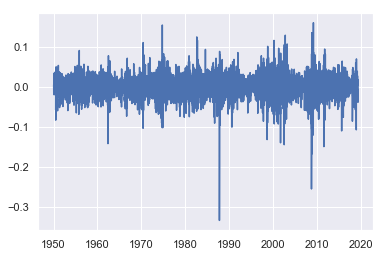

In [26]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

In [27]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

NameError: name 'test_for_stationary' is not defined

# Autocorellation Graphs

In [28]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

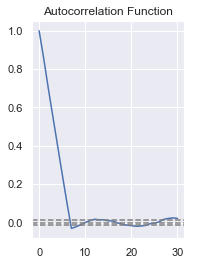

In [29]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

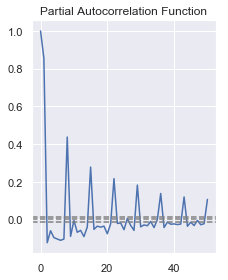

In [30]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

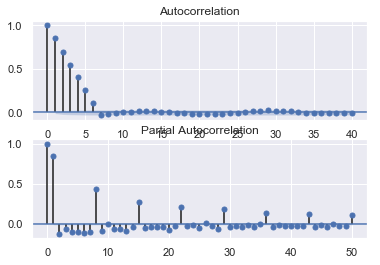

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

# AR Model - Auto Regressive

In [32]:
from statsmodels.tsa.arima_model import ARIMA


In [33]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


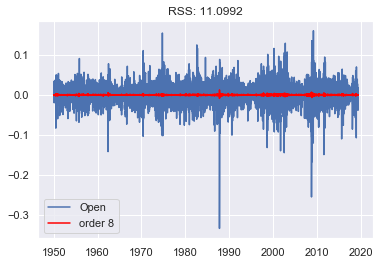

In [34]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


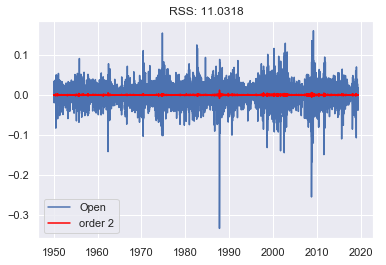

In [35]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [36]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                17456
Model:                 ARIMA(2, 1, 0)   Log Likelihood               56621.124
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 22 May 2019   AIC                        -113234.248
Time:                        10:24:38   BIC                        -113203.178
Sample:                             1   HQIC                       -113224.016
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003   7.19e-05      4.096      0.000       0.000       0.000
ar.L1.D.Open     0.0478      0.008      6.315      0.000       0.033       0.063
ar.L2.D.Open    -0.0420      0.008     -5.54

# MA Model - Moving Average

/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/stocks/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 11.0946')

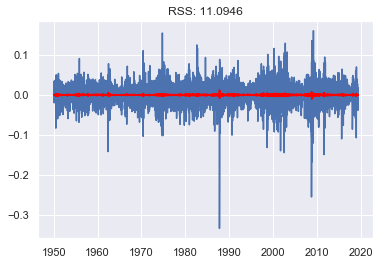

In [37]:
model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [ ]:
print(results_MA.summary())

In [ ]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

In [ ]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

# ARIMA Model - Autoregressive Integrated Moving Average

In [ ]:
model = ARIMA(ts_logtransformed, order=(20,1,18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  

In [ ]:

plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [ ]:
print(results_ARIMA.summary())

In [ ]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

In [ ]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [ ]:
test = pd.read_csv("../Stock Price Prediction/^GSPC.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test


In [ ]:
test.shape

# ARIMA Prediction

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [ ]:
dates = [pd.Timestamp('2019-05-21'), pd.Timestamp('2019-05-22'), pd.Timestamp('2019-05-23'),pd.Timestamp('2019-05-24'), pd.Timestamp('2019-05-28'), pd.Timestamp('2019-05-29'), pd.Timestamp('2019-05-30')]
forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test[-7:], forecast)
print('Test MSE: %.3f' % error)

In [ ]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

In [ ]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

In [ ]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

In [ ]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

In [ ]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(data)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-data)**2)/len(data)))

In [ ]:
dates = [pd.Timestamp('2019-05-21'), pd.Timestamp('2019-05-22'), pd.Timestamp('2019-05-23'),pd.Timestamp('2019-05-24'), pd.Timestamp('2019-05-28'), pd.Timestamp('2019-05-29'), pd.Timestamp('2019-05-30')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test[-7:], forecast)
print('Test MSE: %.3f' % error)

In [ ]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

In [ ]:
monthly_mean = data.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

# Alternative Method to See Forecasting Performance

In [ ]:
!conda install -c conda-forge fbprophet --yes

In [ ]:
import fbprophet
from fbprophet import Prophet

In [ ]:
data.head()

In [ ]:
data_prophet = data.copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop=False, inplace=True)
data_prophet.columns =['ds','y']
data_prophet

In [ ]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=7, freq='D')
forecast = m.predict(future)
m.plot(forecast)
data.plot()

In [ ]:
m.plot_components(forecast)


In [ ]:
forecast.columns

In [ ]:
forecasted_values = forecast[['ds', 'yhat']].tail(7)
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

In [ ]:
mean_squared_error(forecasted_values['y'],test[-7:])